### 1. Installing and importing all necessary dependencies ###

In [15]:
%pip install gym[atari]
%pip install ale_py
%pip install autorom[accept-rom-license]
%pip install torch
%pip install gym[box2d]

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 2.5/2.5 MB 11.3 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 12.8 MB/s eta 0:00:00
     -------------------------------------- 374.4/374.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for box2d-py
Failed to build box2d-py
  Running setup.py install for box2d-py: started
  Running setup.py install for box2d-py: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [16 lines of output]
      Using setuptools (version 63.4.1).
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-39
      creating build\lib.win-amd64-cpython-39\Box2D
      copying library\Box2D\Box2D.py -> build\lib.win-amd64-cpython-39\Box2D
      copying library\Box2D\__init__.py -> build\lib.win-amd64-cpython-39\Box2D
      creating build\lib.win-amd64-cpython-39\Box2D\b2
      copying library\Box2D\b2\__init__.py -> build\lib.win-amd64-cpython-39\Box2D\b2
      running build_ext
      building 'Box2D._Box2D' extension
      swigging Box2D\Box2D.i to Box2D\Box2D_wrap.cpp
      swig.exe -python -c++ -IBox2D -small -O -includeall -ignoremissing -w201 -globals b2Globals -outdir library\Box2D -keyword -w511 -D_SWIG_KWARGS -o Box2D\Box2D_wrap.cpp Box2D\Box2D.i
      error: command 'swi

In [3]:
import gym

### 2. Creating our environment ###
By using the function gym.make() we create our environment. We pass the following parameters to the function: 
| Parameter | Value | Explanation |
| :--- | :----: | :--- |
| name | "ALE/Freeway-v5" | This is the name of our game. We are using the newest version v5. ALE (Arcade Learning Environment) is a framework used to develop AI agents for Atari games. |
| difficulty | 1 | The game provides two different difficulties. Using difficulty = 1, the chicken is moved back to the start after each collision. For difficulty = 0, it is only thrown back. |
| mode | 3 | The game provides eight different modes. As the value increases, so does the number and the speed of the cars. |
| obs_type | "rgb" | This argument determines what observations are returned by the environment. By using "rgb" it returns a rgb image as an observation |
| frameskip |  | This argument influences frame skipping (for more information read the paragraph Stochasticity) |
| repeat_action_probability |  | This argument sets the probability for sticky actions (for more information read the paragraph Stochasticity) |
| render_mode | "human" | This will display the game while its running. During the training of the agent, this parameter is deactivated. |

In [4]:
env = gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "rgb", frameskip = 1, render_mode = "human")

#### Observation space ####

In [3]:
observation_space = env.observation_space
print("Our environment returns the following observation: {}".format(observation_space))
print("Since {} is the shape of our observation space, we recieve a 210px * 160px rgb image.".format(observation_space.shape))
print("The image gets stored as a three-dimensional array. The dimensions are 210, 160 and 3.")
print("If you want to get an example of an image try printing observation_space.sample().")
#print(observation_space.sample())
print("By using the uint data type (unsinged int using 8 bits) the lowest possible entry is 0 while 255 is the highest possible entry")

Our environment returns the following observation: Box(0, 255, (210, 160, 3), uint8)
Since (210, 160, 3) is the shape of our observation space, we recieve a 210px * 160px rgb image.
The image gets stored as a three-dimensional array. The dimensions are 210, 160 and 3.
If you want to get an example of an image try printing observation_space.sample().
By using the uint data type (unsinged int using 8 bits) the lowest possible entry is 0 while 255 is the highest possible entry


#### Action space ####

In [4]:
action_space = env.action_space
print("Number of different possible actions we can choose from: {}".format(action_space))
print("Possible actions with corresponding values:")
print(env.unwrapped.get_action_meanings())
print("[0, 1, 2]")

Number of different possible actions we can choose from: Discrete(3)
Possible actions with corresponding values:
['NOOP', 'UP', 'DOWN']
[0, 1, 2]


#### Rewards ####
Without any changes on the environment, there is only one reward. If the chickens crosses the road it recieves a reward with the value one. Except this case, there are no other rewards, neither for colliding with a car, nor for going backwards. 

#### Stochasticity ####
Since Atari games are deterministic, there is a possibility that the agent just memorizes an optimal sequence of actions instead of using the observations and the reward from the environment. Due to this fact ALE uses so called sticky actions. This ensures that with a low probability the previous action is repeated. Therefore, the action chosen by the agent is not executed. By specifing the repeat_action_probality parameter during the creation of the environment, we can influence the probality of these sticky actions.  
Additionally, Gym implements frame skipping which means that in each step the action is repeated for a random number of frames. By setting specifing the frameskip parameter during the creation of the environment, we can influece this number of frames. Specifically, the value indicates how often an action is repeated per step. By setting this value to one, we prevent frame skipping.

### 3. First Version: Random choices ###
In this first version each step is choosen randomly.

In [1]:
import random

env.reset()
terminated = False

while(terminated == False):
    #Choosing a random action
    random_action = random.choice([0, 1, 2])

    #Recieving information
    observation, reward, terminated, truncated, info = env.step(random_action)
    
    #Render the environment
    env.render()
env.close()

NameError: name 'env' is not defined

In [1]:
import gym

In [2]:
class RelativePosition(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        self.observation_space = Box(shape=(2,), low=-np.inf, high=np.inf)

    def observation(self):
        ram = env.unwrapped.ale.getRAM()
        return ram[14]

In [4]:
class ClipReward(gym.RewardWrapper):
    def __init__(self, env, min_reward, max_reward):
        super().__init__(env)
        self.min_reward = min_reward
        self.max_reward = max_reward
        self.reward_range = (min_reward, max_reward)
        #Initializing the position
        self.pre_position = 0

    def reward(self, reward):
        ram = env.unwrapped.ale.getRAM()
        current_position = ram[14]

        if(current_position > self.pre_pos):
            #Chicken is moving forward
            reward = 10
        elif(current_position < self.pre_pos):
            #Chicken is moving backwards
            reward = -10
        elif(current_position == 6 and self.pre_pos > 6):
            #Chicken got hit
            reward = -100
        else:
            #Chicken is not moving
            reward = 0

        self.pre_position = current_position
        return np.clip(reward, self.min_reward, self.max_reward)

In [ ]:
env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "rgb", frameskip = 1, render_mode = "human"), -100, 100)
import random

env.reset()
terminated = False

while(terminated == False):
    #Choosing a random action
    random_action = random.choice([0, 1, 2])

    #Recieving information
    observation, reward, terminated, truncated, info = env.step(random_action)

    print(reward)

    #Render the environment
    env.render()
env.close()

In [1]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import gym

In [2]:
class ClipReward(gym.RewardWrapper):
    def __init__(self, env, min_reward, max_reward):
        super().__init__(env)
        self.pre_pos = 6
        self.min_reward = min_reward
        self.max_reward = max_reward
        self.reward_range = (min_reward, max_reward)
        self.zieldurchlaeufe = 0

    def reward(self, reward):
        ram = env.unwrapped.ale.getRAM()
        current_pos = ram[14]
        if(current_pos >= 176): #Chicken ist im Ziel
            reward = 100
            self.zieldurchlaeufe += 1
        elif(current_pos > self.pre_pos): #Chicken geht nach vorne
            reward = 10
        elif(self.pre_pos < 176): #Chicken pos. unterm Ziel
            if(current_pos == 6 and self.pre_pos > 6): #Chicken wurde Zurückgesetzt / Carcrash
                reward = -100
            elif(current_pos < self.pre_pos): #Chicken geht zurück
                reward = -10
        else:
            reward = 0 #Chicken bleibt stehen
        self.pre_pos = current_pos
        return np.clip(reward, self.min_reward, self.max_reward)

    def getZieldurchlaeufe(self):
        return self.zieldurchlaeufe

In [3]:
class DeepQNetwork(nn.Module):
    def __init__(self, lr, input_dims, fc1_dims, fc2_dims, n_actions):
        #Vererbung: Aufruf des Konstruktors der Superklasse
        super(DeepQNetwork, self).__init__()
        #Speichern der übergebenen Parameter
        self.input_dims = input_dims #Dimension des Inputs
        self.fc1_dims = fc1_dims #Dimension des ersten fully connected Layer
        self.fc2_dims = fc2_dims #Dimension des zweiten fully connected Layer
        self.n_actions = n_actions #Anzahl der möglichen Aktionen

        #Lineare Transformation
        #Pro Layer wird eine lineare Transformation angewandt
        self.fc1 = nn.Linear(*self.input_dims, self.fc1_dims) #* entpackt die input_dims
        self.fc2 = nn.Linear(self.fc1_dims, self.fc2_dims)
        self.fc3 = nn.Linear(self.fc2_dims, self.n_actions)
        self.optimizer = optim.Adam(self.parameters(), lr=lr)

        #Mean squared error loss
        self.loss = nn.MSELoss()

        #Choosing GPU if possible
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')

        #TODO:
        self.to(self.device)

    def forward(self, state):
        #Activation function (RELU)
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        #Only applied to the first two layers, not the output
        actions = self.fc3(x)
        return actions

In [4]:
class Agent():
    def __init__(self, gamma, epsilon, lr, input_dims, batch_size, n_actions, max_mem_size = 1000000, eps_end = 0.01, eps_dec = 5e-4):
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_min = eps_end
        self.eps_dec = eps_dec
        self.lr = lr
        self.action_space = [i for i in range(n_actions)]
        self.mem_size = max_mem_size
        self.batch_size = batch_size
        self.mem_counter = 0
        
        self.Q_eval = DeepQNetwork(self.lr, n_actions = n_actions, input_dims = input_dims, fc1_dims = 256, fc2_dims= 256)
        self.state_memory = np.zeros((self.mem_size, *input_dims), dtype = np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_dims), dtype = np.float32)
        self.action_memory = np.zeros(self.mem_size, dtype = np.int32)
        self.reward_memory = np.zeros(self.mem_size, dtype = np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype = np.bool_)
    
    def store_transition(self, state, action, reward, state_, done):
        #Memory wird wieder von vorne überschrieben, wenn voll
        index = self.mem_counter % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = done

        self.mem_counter += 1
    
    def choose_action(self, observation):
        if np.random.random() > self.epsilon:
            #Exploitation instead of exploration
            state = T.tensor([observation]).to(self.Q_eval.device)
            actions = self.Q_eval.forward(state)
            #Choosing the best actionu
            action = T.argmax(actions).item()
        else:
            #Exploration instead of exploitation
            action = np.random.choice(self.action_space)

        return action

    def learn(self):
        if self.mem_counter < self.batch_size:
            #Zu Beginn ist der Speicher noch leer
            #deshalb wird der Speicher gefüllt, bevor der Agent anfängt zu lernen
            return
        
        #Gradienten werden auf null gesetzt.
        #Andernfalls werden die Gradienten in Pytorch kummuliert
        self.Q_eval.optimizer.zero_grad()

        max_mem = min(self.mem_counter, self.mem_size)
        batch = np.random.choice(max_mem, self.batch_size, replace = False)

        batch_index = np.arange(self.batch_size, dtype = np.int32)

        state_batch = T.tensor(self.state_memory[batch]).to(self.Q_eval.device)
        new_state_batch = T.tensor(self.new_state_memory[batch]).to(self.Q_eval.device)
        reward_batch = T.tensor(self.reward_memory[batch]).to(self.Q_eval.device)
        terminal_batch = T.tensor(self.terminal_memory[batch]).to(self.Q_eval.device)
        action_batch = self.action_memory[batch]

        q_eval = self.Q_eval.forward(state_batch)[batch_index, action_batch]
        q_next = self.Q_eval.forward(new_state_batch)
        q_next[terminal_batch] = 0.0
        q_target = reward_batch + self.gamma * T.max(q_next, dim = 1)[0]

        loss = self.Q_eval.loss(q_target, q_eval).to(self.Q_eval.device)
        loss.backward()
        self.Q_eval.optimizer.step()

        self.epsilon = self.epsilon - self.eps_dec if self.epsilon > self.eps_min else self.eps_min

    def getModel(self):
        return self.Q_eval

    def setModel(self, path):
        self.Q_eval = T.load(path)

C:\Users\Jan Felix\AppData\Local\Temp\ipykernel_8348\1303999588.py:34: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  state = T.tensor([observation]).to(self.Q_eval.device)


0
episode  0 score -5060.00 epsilon 0.01
13
episode  1 score 2540.00 epsilon 0.01
13
episode  2 score 150.00 epsilon 0.01
14
episode  3 score 1210.00 epsilon 0.01
14
episode  4 score -490.00 epsilon 0.01


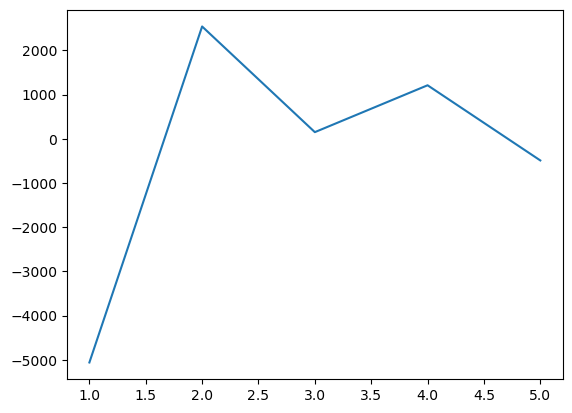

In [5]:
import gym
import numpy as np
from matplotlib import pyplot as plt

env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"), -100, 200)
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.003)
scores, eps_history = [], []
n_games = 5

for i in range(n_games):
    score = 0
    done = False
    observation = env.reset()[0]
    while not done:
        action = agent.choose_action(np.float32(observation))
        #Info2 eingefügt
        observation_, reward, done, info, info2 = env.step(action)
        score += reward
        agent.store_transition(observation, action, reward, observation_, done)
        agent.learn()
        observation = observation_
    scores.append(score)
    eps_history.append(agent.epsilon)
    print(ClipReward.getZieldurchlaeufe(env))
    print('episode ', i, 'score %.2f' % score, 'epsilon %.2f' % agent.epsilon)
x = [i + 1 for i in range(n_games)]


T.save(Agent.getModel(agent), 'C:\\Users\Jan Felix\Desktop\dqn_model\dadajdand')

plt.plot(x, scores)
plt.show()

0
episode  0 score -4190.00 epsilon 0.01


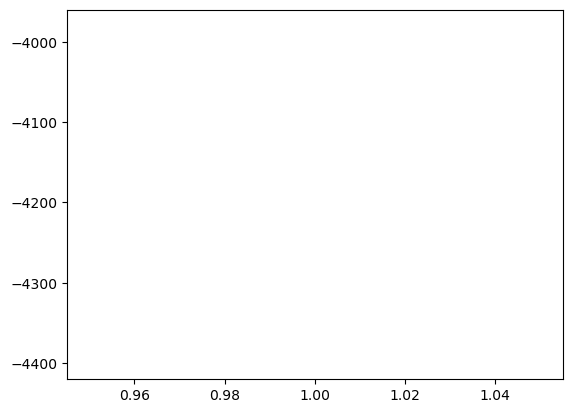

In [6]:
import numpy as np
from matplotlib import pyplot as plt

env = ClipReward(gym.make("ALE/Freeway-v5", difficulty = 1, mode = 3, obs_type = "ram"), -100, 200)
agent = Agent(gamma = 0.99, epsilon = 1.0, batch_size = 64, n_actions = 3, eps_end = 0.01, input_dims = [128], lr = 0.003)
agent.setModel('C:\\Users\Jan Felix\Desktop\dqn_model\dadajdand')

scores, eps_history = [], []
n_games = 1

for i in range(n_games):
    score = 0
    done = False
    observation = env.reset()[0]
    while not done:
        action = agent.choose_action(np.float32(observation))
        #Info2 eingefügt
        observation_, reward, done, info, info2 = env.step(action)
        score += reward
        agent.store_transition(observation, action, reward, observation_, done)
        agent.learn()
        observation = observation_
    scores.append(score)
    eps_history.append(agent.epsilon)
    print(ClipReward.getZieldurchlaeufe(env))
    print('episode ', i, 'score %.2f' % score, 'epsilon %.2f' % agent.epsilon)

x = [i + 1 for i in range(n_games)]
plt.plot(x, scores)
plt.show()
